<a href="https://colab.research.google.com/github/Nikhil-4-Pal/EPRIS-Demo/blob/main/EPRIS_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate the Synthetic Data to Simulate the Process

In [6]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)


def generate_epris_data(n_samples=1000):
  data = []

  safe_notes = [
    "Initial site visit completed as planned. Measurements and layouts confirmed with no discrepancies noted.",
    "Vendor confirmed material availability and delivery timelines align with the project schedule.",
    "Design review completed with client approval. No changes requested at this stage.",
    "Procurement initiated for standard materials; pricing remains within initial estimates.",
    "Electrical and plumbing layouts finalized and shared with execution team.",
    "Vendor coordination meeting completed; all parties aligned on scope and timelines.",
    "Early milestones achieved on schedule with no reported issues.",
    "Material samples approved by client; no rework anticipated.",
    "Site conditions remain stable and ready for next phase of execution.",
    "Weekly progress review indicates steady progress and no dependency risks.",
    "No vendor follow-ups required this week; deliveries tracking as expected.",
    "Installation team confirmed availability as per project plan.",
    "Minor clarifications addressed during site walkthrough; no impact on timeline.",
    "All approvals received for current phase; moving forward as scheduled.",
    "Project tracking metrics remain within acceptable variance limits.",
    "No change requests logged since last review.",
    "Execution quality meeting concluded with no corrective actions required.",
    "Inventory check completed; materials sufficient for upcoming work.",
    "Client communication remains positive with no concerns raised.",
    "Overall project health remains stable with low risk indicators."
  ]

  risky_notes =  [
    "Vendor delivery delayed due to supply issues; revised timelines pending confirmation.",
    "Multiple follow-ups required with vendor regarding missed commitments.",
    "Material availability uncertain; alternative options being explored.",
    "Client requested design revisions after initial approval, impacting execution timeline.",
    "Early cost estimates exceeded due to change in material specifications.",
    "Installation work paused awaiting clarification on revised drawings.",
    "Repeated coordination issues observed between design and execution teams.",
    "Delay in vendor response is affecting dependent tasks.",
    "Escalation raised regarding repeated slippage in material delivery dates.",
    "Procurement costs increased unexpectedly due to market price fluctuations.",
    "Site work rescheduled due to pending vendor confirmation.",
    "Change request logged for scope modification; impact assessment in progress.",
    "Execution team flagged risk of timeline overrun if approvals are further delayed.",
    "Vendor reliability concerns noted based on recent performance trends.",
    "Client expressed concerns regarding progress and delivery timelines.",
    "Rework required due to mismatch between approved design and on-site execution.",
    "Project review highlighted dependency risks not previously accounted for.",
    "Budget variance increasing faster than planned during early execution phase.",
    "Multiple issues logged within a short period, indicating instability.",
    "Management intervention requested to resolve ongoing vendor and schedule challenges."
  ]

  for i in range(n_samples):
    project_ID = f"PRJ_{i+1001}"
    initial_budget = np.random.randint(20000,5000000)
    duration_weeks = np.random.randint(4,52)
    vendor_score = np.random.choice(np.arange(1,11), p = [0.05, 0.05, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.05, 0.05])
    complexity = np.random.choice([1,2,3], p=[0.3,0.4,0.3])
    risk_prob = 0.1
    if vendor_score < 0.5 : risk_prob += 0.4
    if complexity  ==3 : risk_prob +=0.2
    if initial_budget < 30000 : risk_prob += 0.1

    is_risky = 1 if random.random() < risk_prob else 0

    if is_risky:
      note_count = random.randint(1,3)
      notes = " ".join(random.choices(risky_notes, k=note_count) + random.choices(safe_notes, k=1))
    else :
      note_count = random.randint(1,3)
      notes = " ".join(random.choices(safe_notes, k=note_count))

    data.append({
        "Project_ID":project_ID,
        "Initial_Budget" : initial_budget,
        "Duration_Weeks" : duration_weeks,
        "Vendor_Reliability" : vendor_score,
        "Design_Complexity" : complexity,
        "PM_Notes" : notes,
        "Risk_flag" : is_risky
    })

  return data

df = generate_epris_data(n_samples=10000)
df = pd.DataFrame(df)
print("Dataset Shape : ",df.shape)
display(df.head())

Dataset Shape :  (10000, 7)


,Project_ID,Initial_Budget,Duration_Weeks,Vendor_Reliability,Design_Complexity,PM_Notes,Risk_flag
0,PRJ_1001,1712743,24,3,1,Project tracking metrics remain within accepta...,0
1,PRJ_1002,1156074,27,5,1,Project tracking metrics remain within accepta...,0
2,PRJ_1003,2158242,25,2,3,Vendor confirmed material availability and del...,0
3,PRJ_1004,4541373,41,1,3,Execution team flagged risk of timeline overru...,1
4,PRJ_1005,1282752,15,6,1,Installation team confirmed availability as pe...,0


In [8]:
df.to_csv("EPRIS_Data.csv",index=False)

# EDA and preprocessing

/tmp/ipython-input-684419109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Risk_flag", data=df, palette='viridis')


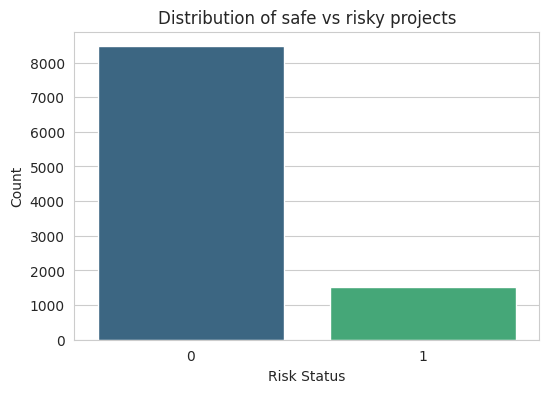

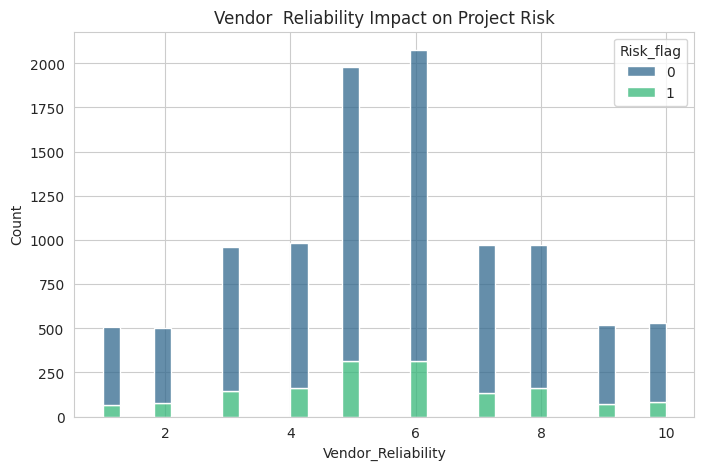

Data Risk Ratio : 15.34% of projects are high risk


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(6,4))
sns.countplot(x="Risk_flag", data=df, palette='viridis')
plt.title("Distribution of safe vs risky projects")
plt.xlabel('Risk Status')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Vendor_Reliability', hue="Risk_flag", multiple="stack", palette='viridis')
plt.title('Vendor  Reliability Impact on Project Risk')
plt.show()

risk_ratio = df['Risk_flag'].mean()
print(f"Data Risk Ratio : {risk_ratio:.2%} of projects are high risk")

# Text Processing

In [12]:
import re

STOPWORDS  = set( [
    "update", "status", "review", "meeting", "discussion", "call", "followup",
    "note", "notes", "comment", "comments", "remark", "remarks",
    "today", "yesterday", "tomorrow", "weekly", "daily", "currently",
    "ongoing", "regular", "routine", "scheduled", "schedule",
    "project", "work", "task", "phase", "stage", "activity", "activities",
    "process", "workflow", "execution",
    "team", "teams", "internal", "external", "stakeholder", "client",
    "vendor", "vendors", "contractor", "contractors",
    "checked", "reviewed", "discussed", "shared", "aligned", "coordinated",
    "confirmed", "noted", "observed", "updated",
    "attached", "attachment", "document", "documents", "file", "files",
    "sheet", "sheets", "report", "reports",
    "please", "kindly", "thanks", "thank", "regards",
    "minor", "general", "overall", "basic", "standard",
    "forward", "moving", "progress", "progressing"
])

def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]','',text)
  words = text.split()

  cleaned_words  = [w for w in words if w not in STOPWORDS ]
  return " ".join(cleaned_words)

df['Cleaned_Notes'] = df['PM_Notes'].apply(clean_text)

print("--RAW TEXT--")
print(df['PM_Notes'].iloc[0])
print("\n--- Cleaned Text---")
print(df['Cleaned_Notes'].iloc[0])

--RAW TEXT--
Project tracking metrics remain within acceptable variance limits.

--- Cleaned Text---
tracking metrics remain within acceptable variance limits


# Feature Engineering

In [14]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=50)

text_features = tfidf.fit_transform(df['Cleaned_Notes']).toarray()
print('Text Processing is complete')
print(f"Top 10 key words discovered:{tfidf.get_feature_names_out()[:10]}")

structured_cols = ["Initial_Budget", "Duration_Weeks","Vendor_Reliability", "Design_Complexity"]
structured_features = df[structured_cols].values

x = np.hstack((structured_features, text_features))
y = df['Risk_flag'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y )
print("-"*20)
print(f"Data Prepared successfully!")
print(f"Training Matrix (x_train): {x_train.shape} (800 projects)")
print(f"Testing Matrix (x_test):   {x_test.shape} (200 projects)")
print(f"Feature Count: {x_train.shape[1]} (4 Structured + 50 Text Features)")

Text Processing is complete
Top 10 key words discovered:['all' 'and' 'approval' 'approvals' 'approved' 'as' 'availability'
 'change' 'completed' 'concerns']
--------------------
Data Prepared successfully!
Training Matrix (x_train): (8000, 54) (800 projects)
Testing Matrix (x_test):   (2000, 54) (200 projects)
Feature Count: 54 (4 Structured + 50 Text Features)


# Modelling and Evaluation

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ratio = float(np.sum(y_train==0)) / np.sum(y_train==1)

model = XGBClassifier(
    n_estimators=100,
    learning_rate = 0.05,
    max_depth=6,
    scale_pos_weight=ratio,
    random_state=42,
    use_label_encoder=False,
    eval_metric = 'logloss'
)

print("Training XGB model........")
model.fit(x_train, y_train)
print('training complete!')

Training XGB model........


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:09:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


training complete!


------- Model Performance Metrics --------
              precision    recall  f1-score   support

        Safe       0.99      1.00      1.00      1693
        Risk       0.98      0.97      0.98       307

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



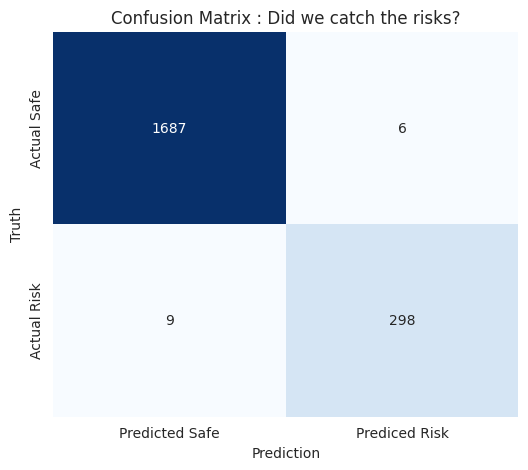

In [18]:
y_pred = model.predict(x_test)

print("------- Model Performance Metrics --------")
print(classification_report(y_test, y_pred, target_names=['Safe', 'Risk']))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',cbar=False,
            xticklabels=['Predicted Safe', 'Prediced Risk'],
            yticklabels=['Actual Safe', 'Actual Risk'])
plt.title('Confusion Matrix : Did we catch the risks?')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

# Explainibility

In [19]:
!pip install shap

/tmp/ipython-input-4068729784.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test, feature_names=structured_cols + list(tfidf.get_feature_names_out()))


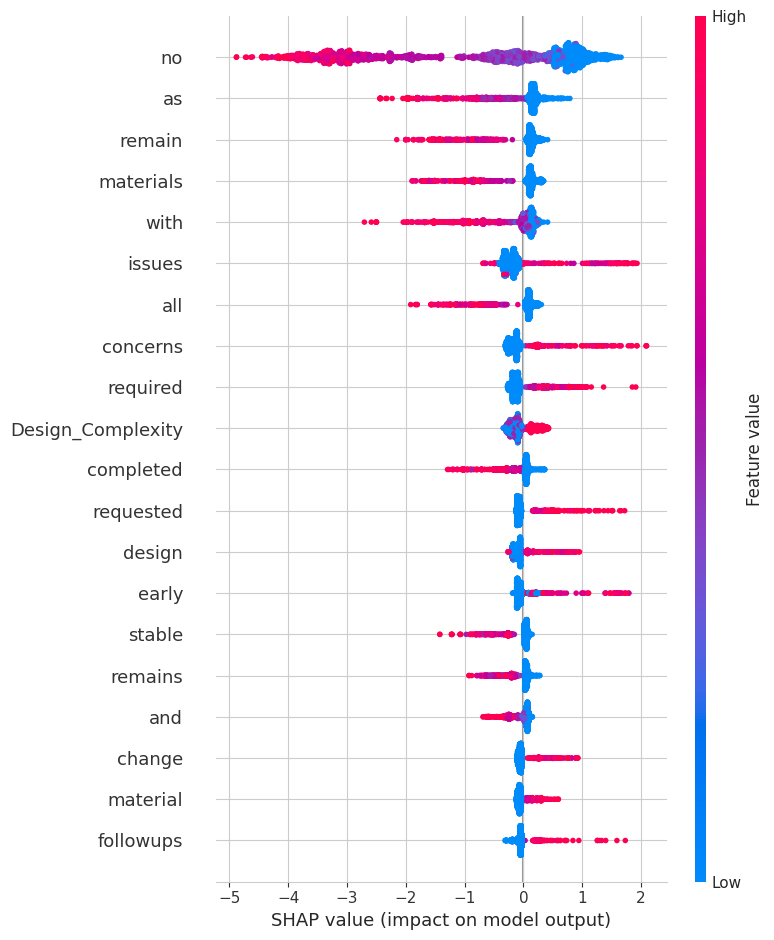

In [22]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, x_test, feature_names=structured_cols + list(tfidf.get_feature_names_out()))